In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
import splitfolders
splitfolders.ratio('./kaggledata-2/Fish_Dataset', output="./kaggledata-2/paperdata", seed=1337, ratio=(.7, 0.15,0.15)) 

Copying files: 9000 files [00:32, 278.09 files/s]


In [7]:
data_dir = Path('./kaggledata-2/paperdata/train')

# Get filepaths and labels
filepaths = list(data_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
train_df = pd.concat([filepaths, labels], axis=1)
train_df

,Filepath,Label
0,kaggledata-2\paperdata\train\Black Sea Sprat\0...,Black Sea Sprat
1,kaggledata-2\paperdata\train\Black Sea Sprat\0...,Black Sea Sprat
2,kaggledata-2\paperdata\train\Black Sea Sprat\0...,Black Sea Sprat
3,kaggledata-2\paperdata\train\Black Sea Sprat\0...,Black Sea Sprat
4,kaggledata-2\paperdata\train\Black Sea Sprat\0...,Black Sea Sprat
...,...,...
6295,kaggledata-2\paperdata\train\Trout\00996.png,Trout
6296,kaggledata-2\paperdata\train\Trout\00997.png,Trout
6297,kaggledata-2\paperdata\train\Trout\00998.png,Trout
6298,kaggledata-2\paperdata\train\Trout\00999.png,Trout


In [8]:
data_dir = Path('./kaggledata-2/paperdata/val')

# Get filepaths and labels
filepaths = list(data_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
val_df = pd.concat([filepaths, labels], axis=1)
val_df

,Filepath,Label
0,kaggledata-2\paperdata\val\Black Sea Sprat\000...,Black Sea Sprat
1,kaggledata-2\paperdata\val\Black Sea Sprat\000...,Black Sea Sprat
2,kaggledata-2\paperdata\val\Black Sea Sprat\000...,Black Sea Sprat
3,kaggledata-2\paperdata\val\Black Sea Sprat\000...,Black Sea Sprat
4,kaggledata-2\paperdata\val\Black Sea Sprat\000...,Black Sea Sprat
...,...,...
1345,kaggledata-2\paperdata\val\Trout\00952.png,Trout
1346,kaggledata-2\paperdata\val\Trout\00960.png,Trout
1347,kaggledata-2\paperdata\val\Trout\00967.png,Trout
1348,kaggledata-2\paperdata\val\Trout\00972.png,Trout


In [3]:
data_dir = Path('./kaggledata-2/paperdata/test')

# Get filepaths and labels
filepaths = list(data_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([filepaths, labels], axis=1)
test_df

,Filepath,Label
0,kaggledata-2\paperdata\test\Black Sea Sprat\00...,Black Sea Sprat
1,kaggledata-2\paperdata\test\Black Sea Sprat\00...,Black Sea Sprat
2,kaggledata-2\paperdata\test\Black Sea Sprat\00...,Black Sea Sprat
3,kaggledata-2\paperdata\test\Black Sea Sprat\00...,Black Sea Sprat
4,kaggledata-2\paperdata\test\Black Sea Sprat\00...,Black Sea Sprat
...,...,...
1345,kaggledata-2\paperdata\test\Trout\00962.png,Trout
1346,kaggledata-2\paperdata\test\Trout\00963.png,Trout
1347,kaggledata-2\paperdata\test\Trout\00971.png,Trout
1348,kaggledata-2\paperdata\test\Trout\00987.png,Trout


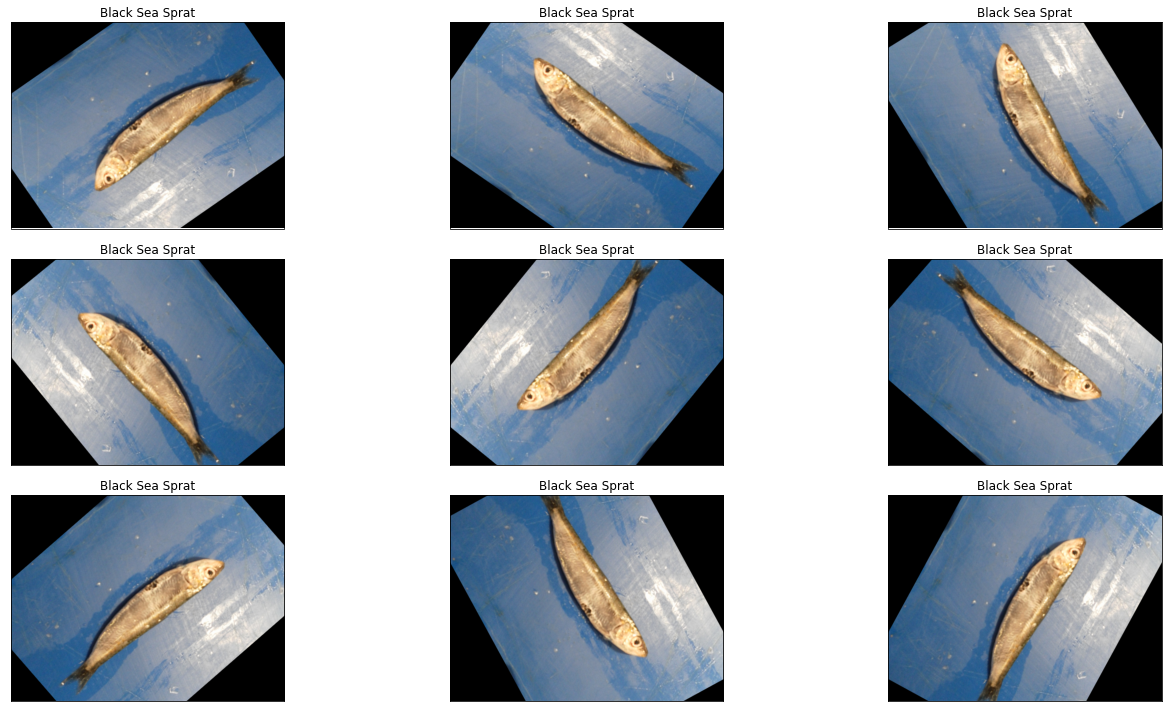

In [10]:
# Displaying images from dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

In [11]:
# image data generators
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
)
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 6300 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.


In [13]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [14]:
# Model building
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
197/197 [==============================] - 117s 520ms/step - loss: 0.1981 - accuracy: 0.9457 - val_loss: 0.0232 - val_accuracy: 0.9948
Epoch 2/50
197/197 [==============================] - 50s 251ms/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.0169 - val_accuracy: 0.9956
Epoch 3/50
197/197 [==============================] - 49s 248ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 4/50
197/197 [==============================] - 48s 244ms/step - loss: 8.2272e-04 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9978
Epoch 5/50
197/197 [==============================] - 49s 247ms/step - loss: 4.5581e-04 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9985


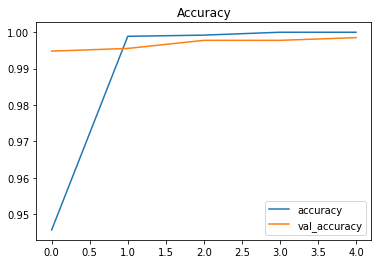

In [15]:
# plot of accuracy and validation accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

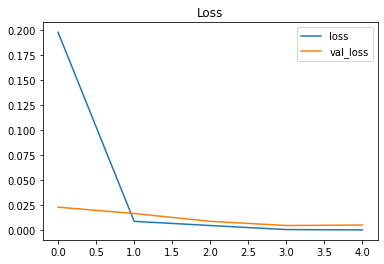

In [16]:
# plot of loss and validation loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [17]:
# Results
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.00279
Test Accuracy: 99.93%


In [18]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
# print(labels)
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat', 'Black Sea Sprat']


In [19]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       150
   Gilt-Head Bream       1.00      0.99      1.00       150
   Hourse Mackerel       1.00      1.00      1.00       150
        Red Mullet       1.00      1.00      1.00       150
     Red Sea Bream       0.99      1.00      1.00       150
          Sea Bass       1.00      1.00      1.00       150
            Shrimp       1.00      1.00      1.00       150
Striped Red Mullet       1.00      1.00      1.00       150
             Trout       1.00      1.00      1.00       150

          accuracy                           1.00      1350
         macro avg       1.00      1.00      1.00      1350
      weighted avg       1.00      1.00      1.00      1350



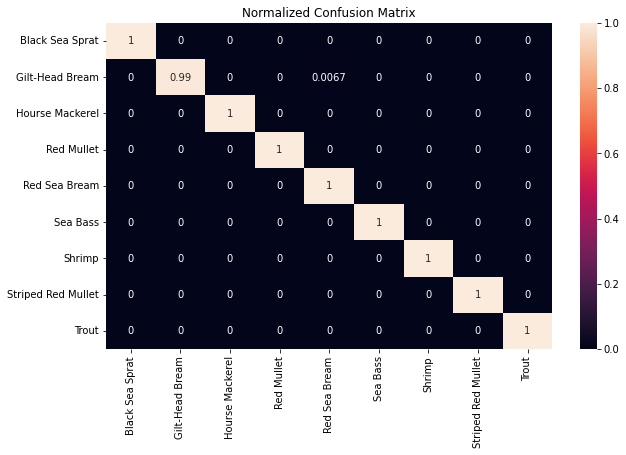

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [21]:
model_version=4
model.save(f"./models/model{model_version}")

INFO:tensorflow:Assets written to: ./models/model4\assets


C:\Users\NEERAJ\anaconda3\envs\DL\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\NEERAJ\anaconda3\envs\DL\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [2]:
model = tf.keras.models.load_model('./models/model4')

In [7]:
data_dir = Path('./kaggledata-2/activationdata')

# Get filepaths and labels
filepaths = list(data_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
test_df1 = pd.concat([filepaths, labels], axis=1)
test_df1

,Filepath,Label
0,kaggledata-2\activationdata\Black Sea Sprat\00...,Black Sea Sprat
1,kaggledata-2\activationdata\Gilt-Head Bream\00...,Gilt-Head Bream
2,kaggledata-2\activationdata\Hourse Mackerel\00...,Hourse Mackerel
3,kaggledata-2\activationdata\Red Mullet\00013.png,Red Mullet
4,kaggledata-2\activationdata\Red Sea Bream\0001...,Red Sea Bream
5,kaggledata-2\activationdata\Sea Bass\00013.png,Sea Bass
6,kaggledata-2\activationdata\Shrimp\00013.png,Shrimp
7,kaggledata-2\activationdata\Striped Red Mullet...,Striped Red Mullet
8,kaggledata-2\activationdata\Trout\00013.png,Trout


In [10]:
test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_images1 = test_generator1.flow_from_dataframe(
    dataframe=test_df1,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 9 validated image filenames belonging to 9 classes.


In [14]:
pred = model.predict(test_images1)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (test_images1.class_indices)
labels = dict((v,k) for k,v in labels.items())
# print(labels)
pred = [labels[k] for k in pred]
pred

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [8]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

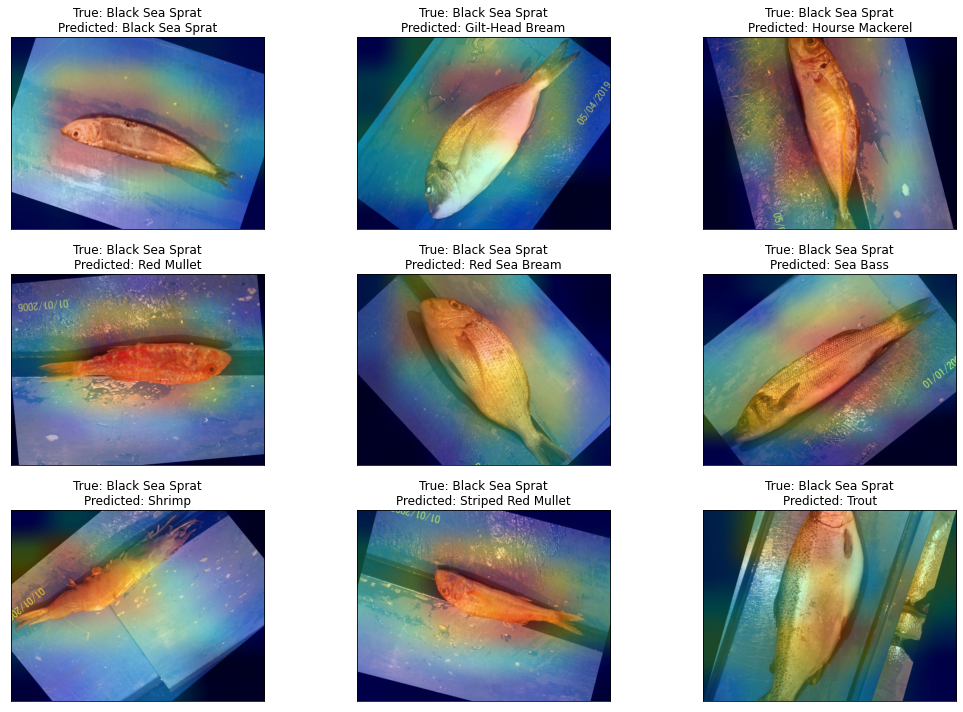

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df1.Filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()